In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATAPATH = '../../datasets'
data = loadmat(os.path.join(DATAPATH,'ex3data1.mat'))

In [3]:
X = data['X']
y = data['y']

In [4]:
np.shape(X)

(5000, 400)

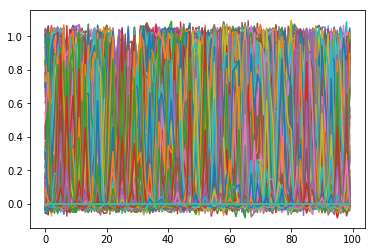

In [5]:
#Display data
plt.plot(X[0:100])
plt.show()

In [6]:
np.shape(X[0:100])

(100, 400)

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
def cost_function(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = -np.multiply(y, np.log(sigmoid(X*theta.T)))
    second = np.multiply((1- y), np.log(1-sigmoid(X*theta.T)))
    reg = (lr/(2*len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second)/len(X)+ reg

In [27]:
def gradient_function(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    grad = ((X.T * error) / len(X)).T + ((lr / len(X)) * theta)

    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)

    return np.array(grad).ravel()

In [18]:
from scipy.optimize import minimize

def one_vs_all(X, y, num_labels, learning_rate):  
    rows = X.shape[0]
    params = X.shape[1]

    # k X (n + 1) array for the parameters of each of the k classifiers
    all_theta = np.zeros((num_labels, params + 1))

    # insert a column of ones at the beginning for the intercept term
    X = np.insert(X, 0, values=np.ones(rows), axis=1)

    # labels are 1-indexed instead of 0-indexed
    for i in range(1, num_labels + 1):
        theta = np.zeros(params + 1)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))

        # minimize the objective function
        fmin = minimize(fun=cost_function, x0=theta, args=(X, y_i, learning_rate), method='TNC', jac=gradient_function)
        all_theta[i-1,:] = fmin.x

    return all_theta

In [19]:
rows = data['X'].shape[0]  
params = data['X'].shape[1]

all_theta = np.zeros((10, params + 1))

X = np.insert(data['X'], 0, values=np.ones(rows), axis=1)

theta = np.zeros(params + 1)

y_0 = np.array([1 if label == 0 else 0 for label in data['y']])  
y_0 = np.reshape(y_0, (rows, 1))

X.shape, y_0.shape, theta.shape, all_theta.shape

((5000, 401), (5000, 1), (401,), (10, 401))

In [20]:
np.unique(data['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [14]:
X.shape, y.shape, theta.shape

((5000, 401), (5000, 1), (1, 401))

In [28]:
all_theta = one_vs_all(data['X'], data['y'], 10, 1)  
all_theta 

array([[-2.38019007e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30452851e-03, -7.76181983e-10,  0.00000000e+00],
       [-3.18260598e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.46020915e-03, -5.08522204e-04,  0.00000000e+00],
       [-4.79623510e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.86725655e-05, -2.46618827e-07,  0.00000000e+00],
       ...,
       [-7.98633994e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94857048e-05,  7.21362786e-06,  0.00000000e+00],
       [-4.57309131e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33432402e-03,  9.98076667e-05,  0.00000000e+00],
       [-5.40501907e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16637491e-04,  7.89517534e-06,  0.00000000e+00]])

In [22]:
def predict_all(X, all_theta):  
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]

    # same as before, insert ones to match the shape
    X = np.insert(X, 0, values=np.ones(rows), axis=1)

    # convert to matrices
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)

    # compute the class probability for each class on each training instance
    h = sigmoid(X * all_theta.T)

    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1)

    # because our array was zero-indexed we need to add one for the true label prediction
    h_argmax = h_argmax + 1

    return h_argmax

In [24]:
y_pred = predict_all(data['X'], all_theta)  
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, data['y'])]  
accuracy = (sum(map(int, correct)) / float(len(correct)))  
print('accuracy = {0}%'.format(accuracy * 100))


accuracy = 94.46%
